### 分類とは
分類とは、データのクラスを予測して分けるタスクの事  
  
あるユーザー郡のデータを基に、「退会しそう」「退会しなさそう」というグループに分けるような処理を分類という  
こういった、タスクは**教師あり学習の典型**である  
  
分類を行うアルゴリズムとしては以下の3つが良く知られている  
* サポートベクターマシン
* 決定木
* ランダムフォレスト

### 分類モデル構築の流れ
分類モデルを構築する前にデータを用意する  
  
先ず、データセットを**学習用**と**テスト用**に分割する  
分類モデルの構築は、学習用データセットを用いて行い、(学習と呼ばれるステップ)  
その精度はテスト用データセットを用いて評価する(精度の事を汎化能力とも呼ぶ)  
  
また、データセットを学習用とテスト用に分け、学習、評価を行い  
また、データを分け...  
と繰り返す(同じデータに対してばかり学習するのを防ぐ効果がある)方法を**交差検証**という  
  
学習ステップはscikit-learnのfit  
予測ステップはscikit-learnのpredictを用いる

In [2]:
from sklearn.datasets import load_iris

# scikit-learnで用意されているデータセット
iris = load_iris()

iris_data = iris.data
species_data = iris.target

print(f"iris_data:\n{iris_data[:5]}\n")
print(f"species_data:\n{species_data[:5]}\n")

iris_data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

species_data:
[0 0 0 0 0]



scikit-learnではあらかじめデータセットが用意されている  
irisとはアヤメの事で、150枚のアヤメの画像が用意されている  
  
1つのアヤメに対して、4つの情報が用意されている  
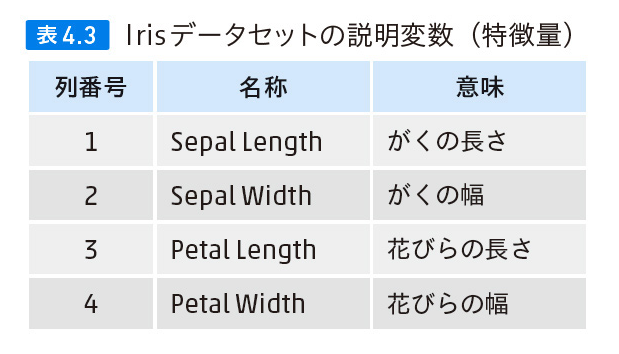  
  
targetはアヤメを分類する  
`trainig_data[1]`に対して、そのアヤメの種類のダミー変数が`target_data[1]`に入るというイメージ  
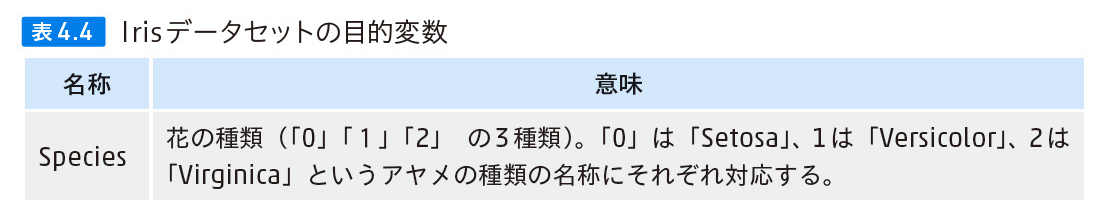

それぞれのデータを学習用、評価用に分割する  

In [3]:
from sklearn.model_selection import train_test_split

# テストサイズを全体の3割として、乱数シード123で分割(通常乱数シードは指定しない)
iris_train,iris_test,specie_train,specie_test = train_test_split(iris_data,species_data,
                                                                 test_size=0.3,random_state=123)

print(iris_train.shape)
print(iris_test.shape)
print(specie_train.shape)
print(specie_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### サポートベクタマシン
サポートベクタマシン(support vector machine , SVM)は分類、回帰だけでなく、外れ値検出にも使えるアルゴリズム  
  
直線や平面で分離できないデータ群を、より高次元の空間に移して線形分離をして、分類を行うアルゴリズム  
高次元の空間に移すというのは、厳密にはデータ間の近さを定量化するカーネルというものを用いている  
  
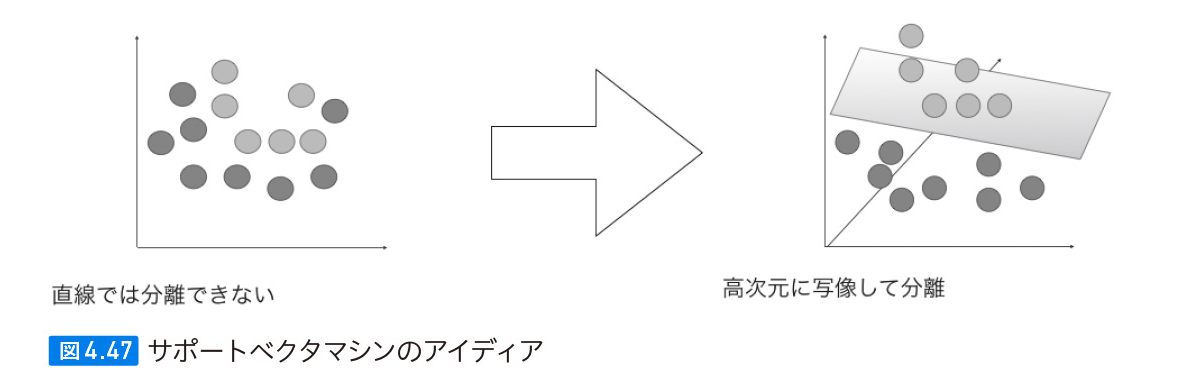  
  
例えば、以下の場合は分類が用意(線形分離可能)である  
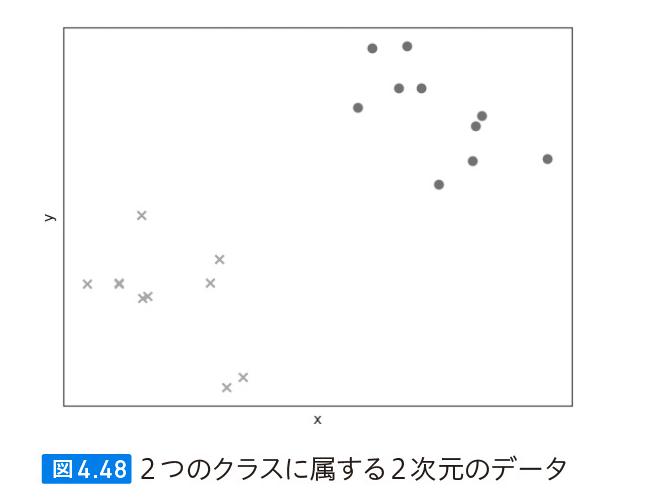  
  
この場合の分離方法はいくつか考案できる  
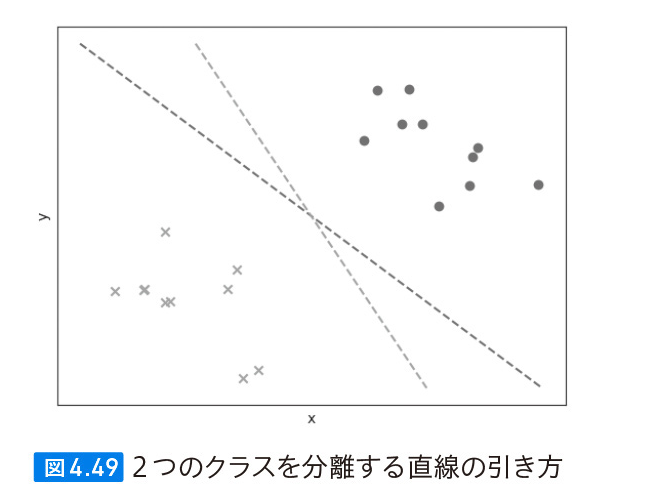  
  
サポートベクタマシンは、ひいた直線と、それに最も近い各クラス間のデータの距離が最も遠くなるように直線を引いていく  
  
この、分類に用いる直線を**決定境界**  
各クラスのうち、直線に最も近いデータを**サポートベクタ**  
クラス間のサポートベクタの距離を**マージン**という  
  
サポートベクタマシンは、マージンを最大にする決定境界を見つけるアルゴリズムである  
最大にする理由は、未知データに対応する能力(汎化能力)を高めるため  
  
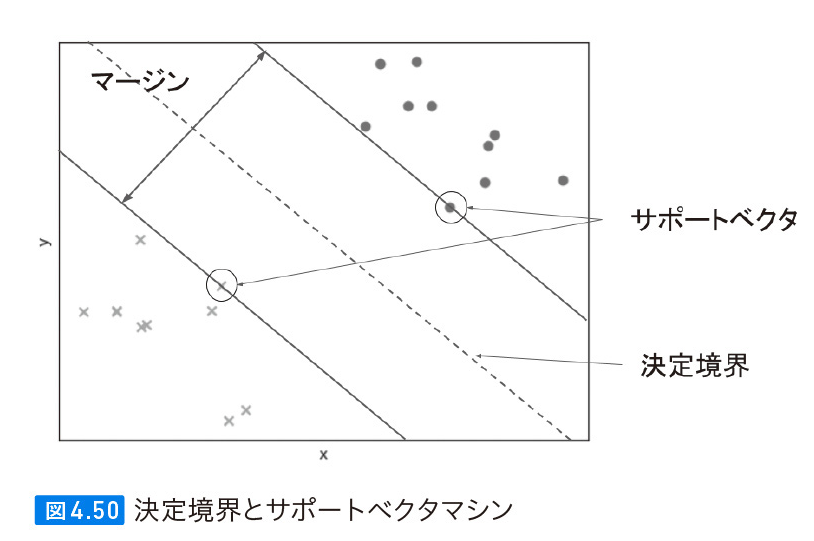  
  
ここで、サポートベクタマシンをscikit-learnを用いて理解する  
  
* クラス0 X-Yともに0～1に分布する一様乱数(100個)
* クラス1 X-Yともに-1～0に分布する一様乱数(100個)
  
これで分類させてみる

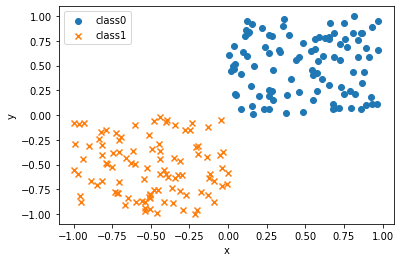

In [4]:
import numpy
import matplotlib.pyplot as pyplot

# クラス0を作成
# 0~1までのデータを100点。x-y欲しいので2列分
# ラベルは100個のデータそれぞれを識別するために生成する
# クラス0の場合ラベルは全て0
class_0 = numpy.random.uniform(0,1,size=(100,2))
label_0 = numpy.repeat(0,100)

# クラス1を生成
class_1 = numpy.random.uniform(-1,0,size=(100,2))
label_1 = numpy.repeat(1,100)

canvas,sub_plots = pyplot.subplots()

sub_plots.scatter(class_0[:,0],class_0[:,1],marker="o",label="class0")
sub_plots.scatter(class_1[:,0],class_1[:,1],marker="x",label="class1")

sub_plots.set_xlabel("x")
sub_plots.set_ylabel("y")

sub_plots.legend()
pyplot.show()

上記データを基にサポートベクタマシンによる分類を行う

In [5]:
from sklearn.svm import SVC

def visualization_svm(class_0,label_0,
                       class_1,label_1,
                       kernel,C,
                       class_max=1,class_min=-1,
                       label_max=1,label_min=-1):
    # SVCの学習ステップ
    svc = SVC(kernel=kernel,C=C)
    svc.fit(numpy.vstack((class_0,class_1)),
            numpy.hstack((label_0,label_1)))
    
    # SVCの可視化ステップ
    canvas,sub_plots = pyplot.subplots()
    
    # 学習データのプロット
    sub_plots.scatter(class_0[:,0],class_0[:,1],marker="o",label="class0")
    sub_plots.scatter(class_1[:,0],class_1[:,1],marker="x",label="class1")
    
    # 決定境界とマージンをプロット
    xx,yy = numpy.meshgrid(numpy.linspace(class_min,class_max,100),
                           numpy.linspace(label_min,label_max,100))
    xy = numpy.vstack([xx.ravel(),yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100,100))
    sub_plots.contour(xx,yy,p,
                      colors="k",levels=[-1,0,1],
                      alpha=0.5,linestyles=["--","-","--"])
    
    # サポートベクタをプロット
    sub_plots.scatter(svc.support_vectors_[:,0],
                      svc.support_vectors_[:,1],
                      s=250,facecolors="none",edgecolors="black")
    
    sub_plots.set_xlabel("x")
    sub_plots.set_ylabel("y")

    sub_plots.legend(loc="best")
    pyplot.show()

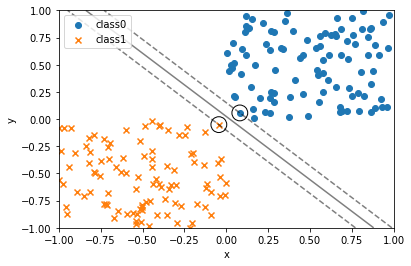

In [6]:
visualization_svm(class_0,label_0,
                  class_1,label_1,
                  kernel="linear",C=1e6)

Cの値を1e6とすると、マージンが変更される  
**Cの値を大きくすればマージンは小さくなる**
  
実践部分が決定境界で、それ未満はClass1  
それ以上はClass0で分類される

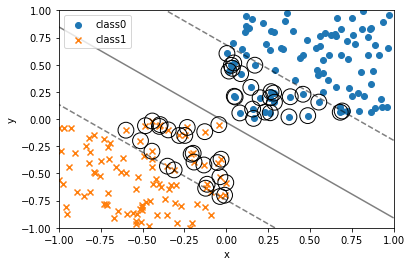

In [7]:
visualization_svm(class_0,label_0,
                  class_1,label_1,
                  kernel="linear",C=0.1)

マージンを広く取ったため、サポートベクタがその分増えた  
つまり、このマージンだと分類がやや難しくなったという事  
  
次に線形分離出来ないものを考えてみる

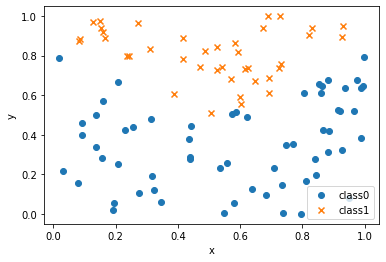

In [10]:
# (x,y)の組を2つ作成
data_set = numpy.random.random(size=(100,2))
# y > (2 * x - 0.5 ^2 +0.5)か否かでクラスラベルを付与。0or1
label = (data_set[:,1]> 2*(data_set[:,0]-0.5)**2 + 0.5).astype(int)

canvas,sub_plots = pyplot.subplots()

sub_plots.scatter(data_set[label == 0,0],data_set[label==0,1],marker="o",label="class0")
sub_plots.scatter(data_set[label == 1,0],data_set[label==1,1],marker="x",label="class1")

sub_plots.set_xlabel("x")
sub_plots.set_ylabel("y")

sub_plots.legend()
pyplot.show()

上記のような規則性によって分布するデータは直線では分離できない  
これをSVCに入力するとどういう結果になるか  
  
また、今回のケースは`kernel="rbf"`と指定し、動径基底関数を使用する

In [14]:
# label行列が0となる行インデックスのデータセットをクラス0とする
class_0 = data_set[label == 0,:]
class_1 = data_set[label == 1,:]

label_0 = label[label == 0]
label_1 = label[label == 1]

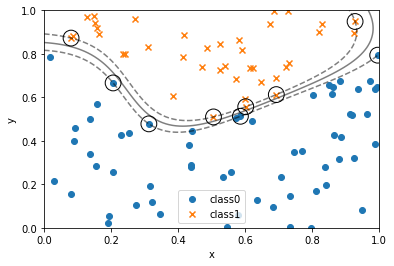

In [15]:
visualization_svm(class_0,label_0,
                  class_1,label_1,
                  kernel="rbf",C=1e3,
                  class_min=0,label_min=0)

動径基底関数を用いる事で、非線形分離によってクラス分類が可能となる  
一般に、サポートベクタマシンは極端に絶対値の大きな特徴量に分類結果が影響を受けやすい  
  
**サポートベクタマシンを用いる時は、正規化を行ってから**分類させると効果が得られやすい

### 決定木
決定木(decision tree)はデータ分割のルールを作成することで、分類する  
生物分類とかでよく見るもので、イメージもしやすいため多用されるアルゴリズム  
  
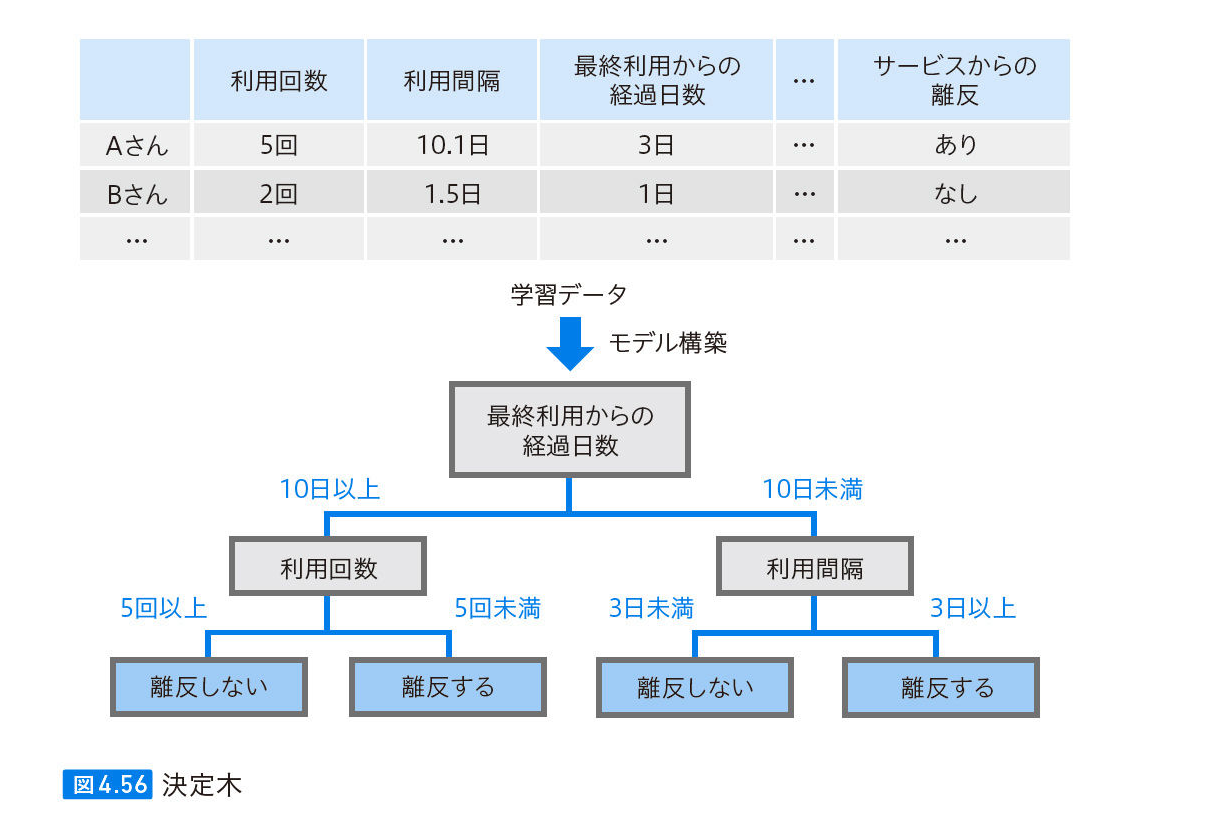  
  
決定木に限らず、「木」と呼ばれるデータ構造には共通の構成がある  
  
先ず**ノード** とそれらを結ぶ**エッジ** から構成される  
  
上記画像の場合は、「利用回数、利用間隔」などがノードで、  
「5回以上、5回未満」などがエッジとなる  
  
また、上位のノードは**親ノード**  
下位のノードは**子ノード**と呼ばれる  
  
木の最上位にあり、親ノードを持たないものを**根ノード**と呼ぶ  
また、木の最下位にあり、子ノードを持たないものを**葉ノード**と呼ぶ  
  
画像の場合は、  
* 根ノード : 「最終利用からの経過日数」
* 葉ノード : 「離反する、離反しない」
* 「利用回数」の親ノード : 「最終利用からの経過日数」
* 「利用回数」の子ノード : 「離反する、しない」
  
となる  
  
決定木で重要なのは**データ分割の方法**  
一般に、決定木でデータ分割するのは**情報利得が大きい分割**によって行われる  
  
この情報利得をどう定義するかが、決定木の肝となる  
  
決定木で分類する時の指標は**どれだけクラスが混在してるか** すなわち **不純度** によって行われる  
分類時に**不純度が最小となるように分類する**というのが、決定木の方針  
  
これから情報利得は次で定義できる  
  
$情報利得 = 親ノードでの不純度 - 子ノードでの不純度の合計$  
  
親ノードの不純度が高い時(例えば100。すなわち、親ノードには複数のクラスが混在している)  
子ノード1つ1つが不純度10で5個あるとする  
すると合計は不純度50  
100 - 50で50の不純度削減に成功するため、情報利得は50と言える  
  
となると、次は**不純度をどうやって定義するか**が肝となってくる  
  
不純度の指標としては**ジニ不純度** , **エントロピー** ,  **分類誤差**の3つが主に用いられる  
  
scikit-learnではジニ不純度が用いられる  

ジニ不純度は、各ノードに間違ったクラスが振り分けられる確率を表す指標  
  
仮に、あるノードにクラス0が割り振られる確率が0.6 , クラス1が割り振られる確率が0.4であるとする  
その時の、ジニ不純度は  
  
#### クラス0なのに、クラス1と判断される確率
$0.4 \times 0.6 = 0.24$  
  
#### クラス1なのに、クラス0と判断される確率
$0.6 \times 0.4 = 0.24$  
  
#### ジニ不純度
$0.24 + 0.24 = 0.48$  
  
これを一般化すると、  
  
#### ジニ不純度(Eとする)
$
E = P(0)(1-P(0)) + P(1)(1-P(1))\\
  = x(1-x) + y(1-y)\\
  = (x-x^2) + (y-y^2)\\
  = x+y-x^2-y^2\\
  = (x+y) - (x^2+y^2)\\
  \cdots 各ノードで混在するクラスの確率の総和は1であるため\\
  = 1 - (x^2+y^2)\\
$
  
これをクラス数を一般化して、クラスがC個ある時  
  
$ E = 1 - \Sigma_{i=0}^{C-1} P(i)^2$  
  
あるノードにクラスが混在している確率は、頻度論の確率を用いて、  
実際に得られたデータから、算出して良い  
  
その時、$ E = 1 - \Sigma_{i=0}^{C-1} P(i)^2$が最小となるように分類を行う  
子ノード全体の不純度が下がることで、情報利得は正になりやすい  

以上、決定木のアルゴリズムをscikit-learnで実装する

In [21]:
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
data_set = iris.data
label = iris.target

train_data,test_data,train_label,test_label = train_test_split(data_set,label,test_size=0.3)

# 最大深度3でクラス分類を行う
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(train_data,train_label)

DecisionTreeClassifier(max_depth=3)

In [22]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,filled=True,
                           rounded=True,
                           class_names=["Setosa","Versicolor","Virginica"],
                           feature_names=["sepal Length","Sepal Width","Petal Length", "Petal Width"],
                           out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")

True

![tree](tree.png)

先ず、根ノードでは、Petal Width(花弁の幅)が1.75以下であるかどうかで分類を行う  
この時のジニ不純度は0.655でこの時点では割と間違えやすい  
  
105サンプル中、2番目"Versicolor"がこの段階では多いため、このノードは不純度0.655でVersicolorと推定できる  
  
このように下っていき、葉ノードではほとんど分類が綺麗にできていることが分かる  
  
次は評価を行う

In [23]:
label_predict = tree.predict(test_data)
label_predict

array([0, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
       2])

In [24]:
test_label

array([0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
       2])

In [27]:
print(len(label_predict))
print(len(test_label))
print(numpy.sum(label_predict == test_label)/len(test_label))

45
45
0.9333333333333333


このことから、分類精度93.33%であることが分かる

### ランダムフォレスト
ランダムフォレスト(random forest)はデータのサンプル特徴量(説明変数)をランダムに選択し、決定機を複数回構築し、  
その結果を受けて、分類、回帰を行う手法  
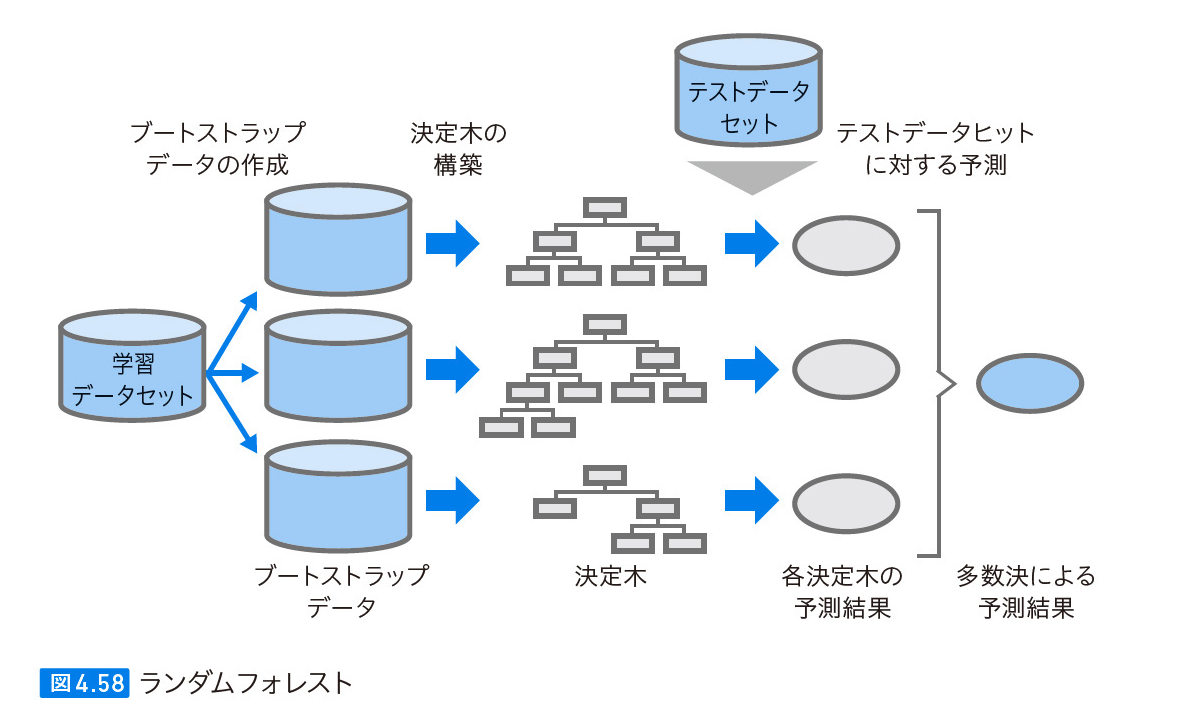  
  
要するに決定木を多く作って、その中で優秀な結果を残したもの同士を用いて最強の決定木を決定するというアルゴリズム  
  
ランダムに選ばれたサンプルと、特徴量のデータを**ブートストラップデータ**と呼ぶ  
ランダムフォレストは、決定木の集合(アンサンブル)である  
  
こういった、ある学習器(ランダムフォレストの場合は決定木)を複数用いた学習方法を**アンサンブル学習**という  
(ニューロンを複数用いたニューラルネットワークもアンサンブル学習?)  
  
アンサンブル学習は多数決が肝であるため、ニューラルネットワークはアンサンブル学習ではなさそう?  
見方しだいか  

In [31]:
from sklearn.ensemble import RandomForestClassifier

# 100本の決定木を用いて学習させる
forest = RandomForestClassifier(n_estimators=100)
forest.fit(train_data,train_label)
label_predict = forest.predict(test_data)
print(label_predict)
print(test_label)
print(numpy.mean(label_predict == test_label))

[0 2 1 0 1 2 2 2 1 2 1 0 1 2 2 2 2 1 2 0 0 0 0 2 1 1 2 2 1 2 2 0 1 1 0 1 0
 0 0 1 2 1 2 1 2]
[0 2 1 0 1 2 2 2 1 1 1 0 2 2 2 2 2 2 2 0 0 0 0 2 1 1 2 2 1 2 2 0 1 1 0 1 0
 0 0 1 2 1 2 1 2]
0.9333333333333333


ランダムフォレストでも93.33%の分類精度となりそう